https://platform.stability.ai/docs/features/text-to-image?tab=python

In [1]:
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
from dotenv import dotenv_values

In [2]:
config = dotenv_values(".env")

In [3]:
stability_api = client.StabilityInference(
    key=config["STABILITY_AI_KEY"], 
    verbose=True,
)

In [29]:
answers = stability_api.generate(
    prompt="Oil painting of a tranquil river surrounded by mountains, with a cabin on the shore, boats, and a sunset, heavily textured brushstrokes, warm and vibrant colors",
#     seed=992446758, # If a seed is provided, the resulting generated image will be deterministic.
                    # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                    # Note: This isn't quite the case for Clip Guided generations, which we'll tackle in a future example notebook.
    steps=30, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
    samples=1, # Number of images to generate, defaults to 1 if not included.
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m)
)

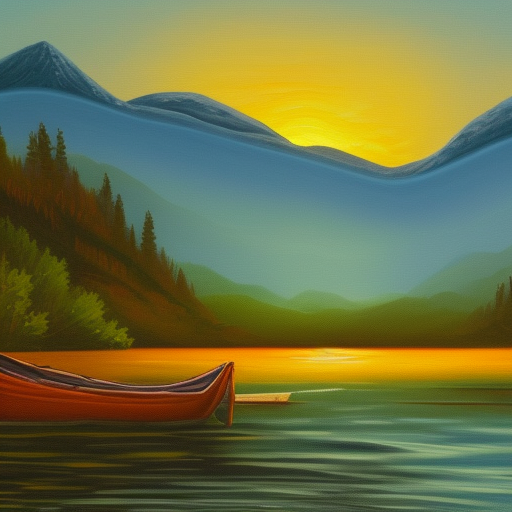

In [30]:
# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated images.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)
            # Save our generated images with their seed number as the filename.
            # img.save(str(artifact.seed)+ ".png") 